In [38]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### This dataset has 3 files as explained below: 
---
- 'application_data.csv'  contains all the information of the client at the time of application. The data is about whether a client has payment difficulties.

- 'previous_application.csv' contains information about the client’s previous loan data. It contains the data on whether the previous application had been Approved, Cancelled, Refused or Unused offer.

- 'columns_description.csv' is data dictionary which describes the meaning of the variables.

In [2]:
app_data = pd.read_csv("application_data.csv")
prev_app = pd.read_csv("previous_application.csv")

In [3]:
col_desc = pd.read_csv("columns_description.csv", encoding = "latin1")

# Application Data Summary and Changes

- The dataset contains 307,511 loan applications with an original shape of (307511, 122)
- Around 91.92% of the applicants are non-defaulters (TARGET = 0) and about 8.07% are defaulters (TARGET = 1), indicating a clear class imbalance
- Features with more than 40% missing values were dropped as they do not add reliable information for analysis → new shape becomes (307511, 73)
- Features with missing values between 5% and 40% were handled using appropriate strategies such as median or mode imputation, depending on the nature of the variable
- Features with less than 5% missing values were left as they are to avoid unnecessary data distortion
- Columns starting with `DAYS_` for analysis, I derived features in years were created without modifying the original day-based columns
- The `DAYS_EMPLOYED` column contained a placeholder value (365243), this value was treated as missing before creating the `EMPLOYMENT_YEARS` feature
- New ratio-based features such as `CREDIT_INCOME_RATIO` and `ANNUITY_INCOME_RATIO` were created to better represent the applicant’s financial load


In [25]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [17]:
app_data.shape

(307511, 122)

In [19]:
app_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,100002.0,189145.5,278202.0,367142.5,456255.0
TARGET,307511.0,0.080729,0.272419,0.0,0.0,0.0,0.0,1.0
CNT_CHILDREN,307511.0,0.417052,0.722121,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,25650.0,112500.0,147150.0,202500.0,117000000.0
AMT_CREDIT,307511.0,599025.999706,402490.776996,45000.0,270000.0,513531.0,808650.0,4050000.0
...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,265992.0,0.007000,0.110757,0.0,0.0,0.0,0.0,9.0
AMT_REQ_CREDIT_BUREAU_WEEK,265992.0,0.034362,0.204685,0.0,0.0,0.0,0.0,8.0
AMT_REQ_CREDIT_BUREAU_MON,265992.0,0.267395,0.916002,0.0,0.0,0.0,0.0,27.0
AMT_REQ_CREDIT_BUREAU_QRT,265992.0,0.265474,0.794056,0.0,0.0,0.0,0.0,261.0


In [22]:
app_data["TARGET"].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [4]:
app_data["TARGET"].value_counts(normalize=True)*100

TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64

### Missing features in application data

In [4]:
# Way too many features so I'll drop some, segmenting them into buckets so I can decide which ones to impute and which to keep

missing = app_data.isnull().mean().sort_values(ascending=False) * 100
missing.head(20)

COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
COMMONAREA_MEDI             69.872297
NONLIVINGAPARTMENTS_MEDI    69.432963
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
FONDKAPREMONT_MODE          68.386172
LIVINGAPARTMENTS_AVG        68.354953
LIVINGAPARTMENTS_MEDI       68.354953
LIVINGAPARTMENTS_MODE       68.354953
FLOORSMIN_MODE              67.848630
FLOORSMIN_AVG               67.848630
FLOORSMIN_MEDI              67.848630
YEARS_BUILD_AVG             66.497784
YEARS_BUILD_MODE            66.497784
YEARS_BUILD_MEDI            66.497784
OWN_CAR_AGE                 65.990810
LANDAREA_MEDI               59.376738
LANDAREA_AVG                59.376738
LANDAREA_MODE               59.376738
dtype: float64

In [5]:
high_missing = missing[missing>40]
mid_missing = missing[(missing <= 40) & (missing > 5)]
low_missing = missing[missing <= 5]

In [26]:
print(len(high_missing))
print(len(mid_missing))
print(len(low_missing))

49
8
65


In [49]:
mid_missing

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
dtype: float64

In [6]:
app_data.drop(columns=high_missing.index, inplace=True)

In [20]:
app_data.shape

(307511, 73)

In [37]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [7]:
# Can't really mode impute a feautres like these, so missing values are filled with unkown and numeric ones are with 0

app_data["OCCUPATION_TYPE"] = app_data["OCCUPATION_TYPE"].fillna("unknown") 
bureau_cols = [
    "AMT_REQ_CREDIT_BUREAU_HOUR",
    "AMT_REQ_CREDIT_BUREAU_DAY",
    "AMT_REQ_CREDIT_BUREAU_WEEK",
    "AMT_REQ_CREDIT_BUREAU_MON",
    "AMT_REQ_CREDIT_BUREAU_QRT",
    "AMT_REQ_CREDIT_BUREAU_YEAR"
]

app_data[bureau_cols] = app_data[bureau_cols].fillna(0)

In [8]:
app_data["EXT_SOURCE_3"] = app_data['EXT_SOURCE_3'].fillna(
    app_data['EXT_SOURCE_3'].median()
)

In [9]:
low_num = app_data[low_missing.index].select_dtypes(include=['int64', 'float64']).columns
low_cat = app_data[low_missing.index].select_dtypes(include='object').columns

low_cat

Index(['NAME_TYPE_SUITE', 'ORGANIZATION_TYPE', 'NAME_CONTRACT_TYPE',
       'FLAG_OWN_CAR', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'NAME_EDUCATION_TYPE', 'CODE_GENDER',
       'FLAG_OWN_REALTY', 'WEEKDAY_APPR_PROCESS_START'],
      dtype='object')

### Fixing Days_* columns in Application Data 

In [28]:
app_data.loc[:,["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"]]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,9461,637.0,3648.0,2120,1134.0
1,16765,1188.0,1186.0,291,828.0
2,19046,225.0,4260.0,2531,815.0
3,19005,3039.0,9833.0,2437,617.0
4,19932,3038.0,4311.0,3458,1106.0
...,...,...,...,...,...
307506,9327,236.0,8456.0,1982,273.0
307507,20775,NaN,4388.0,4090,0.0
307508,14966,7921.0,6737.0,5150,1909.0
307509,11961,4786.0,2562.0,931,322.0


In [17]:
days_col = [col for col in app_data.columns if col.startswith("DAYS_")]
days_col

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [23]:
app_data[days_col] = app_data[days_col].abs()
app_data[days_col].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DAYS_BIRTH,307511.0,16036.995067,4363.988632,7489.0,12413.0,15750.0,19682.0,25229.0
DAYS_EMPLOYED,307511.0,67724.742149,139443.751806,0.0,933.0,2219.0,5707.0,365243.0
DAYS_REGISTRATION,307511.0,4986.120328,3522.886321,0.0,2010.0,4504.0,7479.5,24672.0
DAYS_ID_PUBLISH,307511.0,2994.202373,1509.450419,0.0,1720.0,3254.0,4299.0,7197.0
DAYS_LAST_PHONE_CHANGE,307510.0,962.858788,826.808487,0.0,274.0,757.0,1570.0,4292.0


In [25]:
# Since no one likes to work for 365243 days (1000 years), assuming its a bad value or a placeholder

app_data["DAYS_EMPLOYED"] = app_data["DAYS_EMPLOYED"].replace(365243.0 , np.nan)

In [45]:
app_data["AGE_YEARS"] = app_data["DAYS_BIRTH"] / 365
app_data["EMPLOYMENT_YEARS"] = app_data["DAYS_EMPLOYED"]/365
app_data['REGISTRATION_YEARS'] = app_data['DAYS_REGISTRATION'] / 365

In [81]:
app_data["YEARS_ID_PUBLISH"] = app_data["DAYS_ID_PUBLISH"]/365 

In [62]:
app_data.drop(["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","EMPLOYEMENT_YEARS"],inplace=True,axis=1)
app_data.drop("EMPLOYED_YEARS",axis=1,inplace=True)

### Univariate Analysis Application Data - Plots 

<Axes: xlabel='TARGET', ylabel='count'>

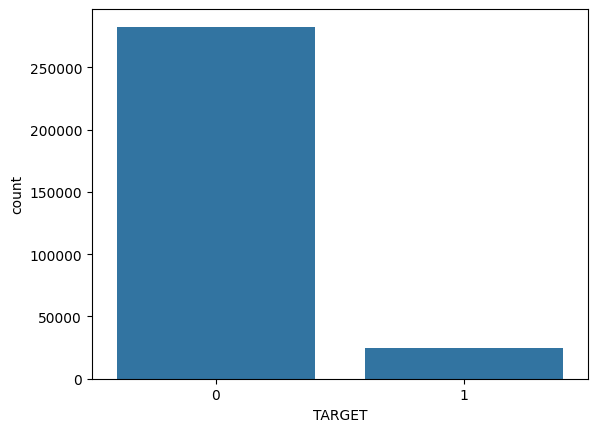

In [68]:
sns.countplot(data=app_data,x="TARGET")

In [70]:
app_data["CREDIT_INCOME_RATIO"] = (
    app_data["AMT_CREDIT"] / app_data["AMT_INCOME_TOTAL"]
)
app_data["ANNUITY_INCOME_RATIO"] = (
    app_data["AMT_ANNUITY"] / app_data["AMT_INCOME_TOTAL"]
)

In [98]:
# I didnt want to plot them one by one so I just made a function.

log_scale_cols = [
    "AMT_INCOME_TOTAL",
    "AMT_CREDIT",
    "AMT_ANNUITY",
    "AMT_GOODS_PRICE",
    "CREDIT_INCOME_RATIO",
    "ANNUITY_INCOME_RATIO"
]

hist_cols = [
    "AGE_YEARS",
    "EMPLOYMENT_YEARS",
    "REGISTRATION_YEARS",
    "YEARS_ID_PUBLISH",
    "OBS_30_CNT_SOCIAL_CIRCLE",
    "DEF_30_CNT_SOCIAL_CIRCLE",
    "OBS_60_CNT_SOCIAL_CIRCLE",
    "DEF_60_CNT_SOCIAL_CIRCLE",
]

kde_cols = ["EXT_SOURCE_2","EXT_SOURCE_3"]

def plot_kde(cols,logscale=False):
    for col in cols:
        plt.figure(figsize=(6,4))

        if logscale:
            plot_data = app_data[app_data[col] > 0]
            sns.kdeplot(
                data=plot_data,
                x=col,
                hue='TARGET',
                common_norm=False,
                log_scale=True
            )
        else:
            sns.kdeplot(
                data=app_data,
                x=col,
                hue='TARGET',
                common_norm=False,
            )
        plt.title(f"{col} by TARGET")
        plt.show()

def plot_hist(cols,logscale=False):
    for col in cols:
        plt.figure(figsize=(6,4))

        if logscale:
            plot_data = app_data[app_data[col] > 0]
            sns.histplot(
                data=plot_data,
                x=col,
                hue='TARGET',
                common_norm=False,
                log_scale=True,
                bins = 30
            )
        else:
            sns.histplot(
                data=app_data,
                x=col,
                hue='TARGET',
                common_norm=False,
                bins=30
            )
        plt.title(f"{col} by TARGET")
        plt.show()

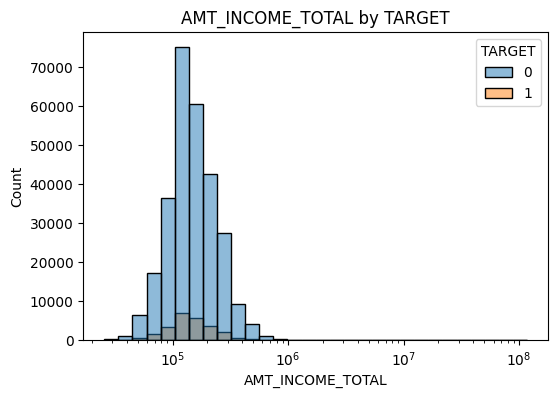

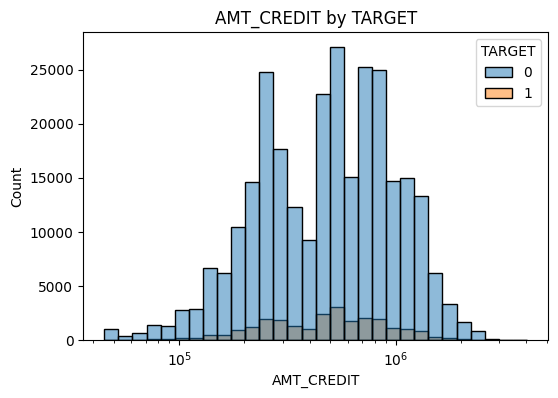

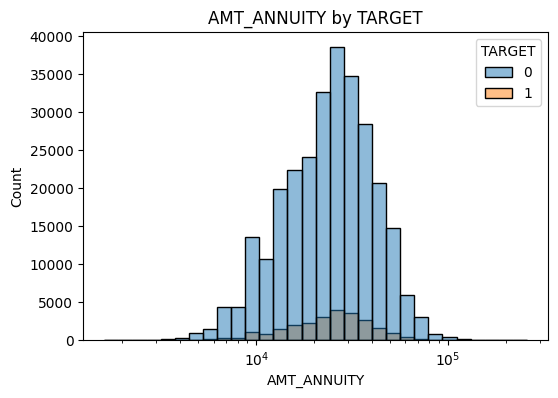

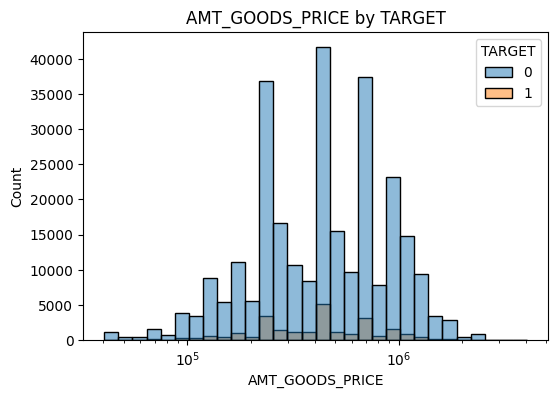

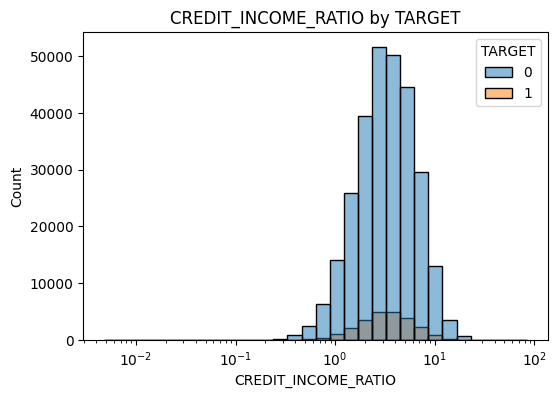

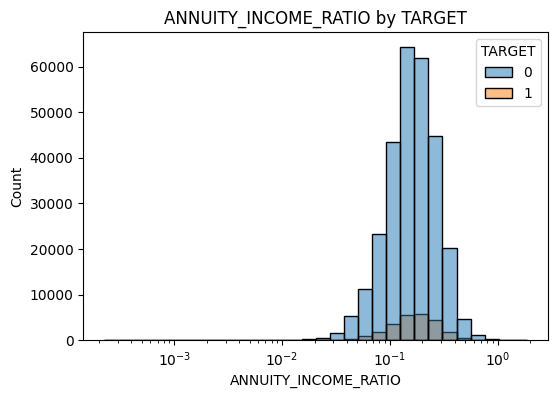

In [102]:
plot_hist(log_scale_cols,logscale=True)

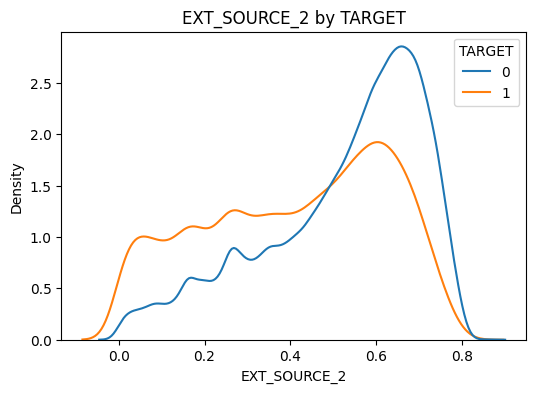

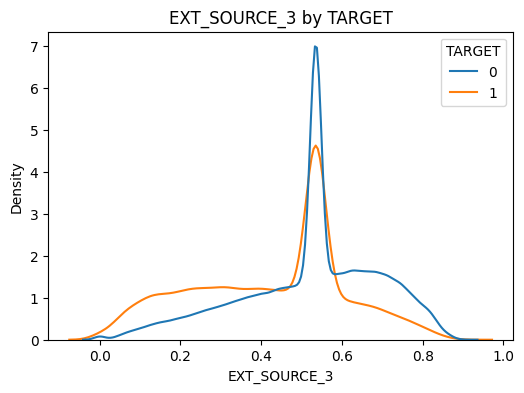

In [100]:
plot_kde(kde_cols)

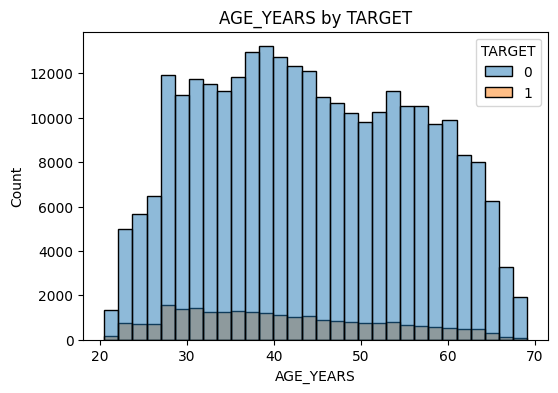

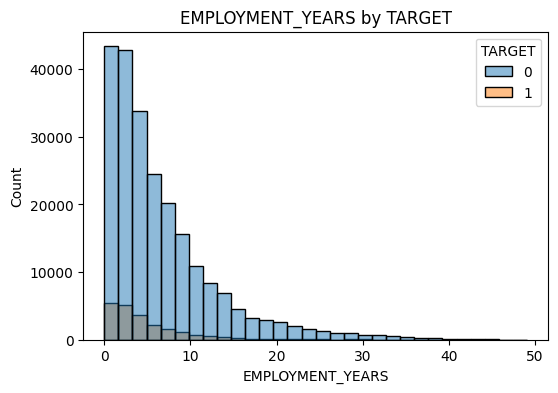

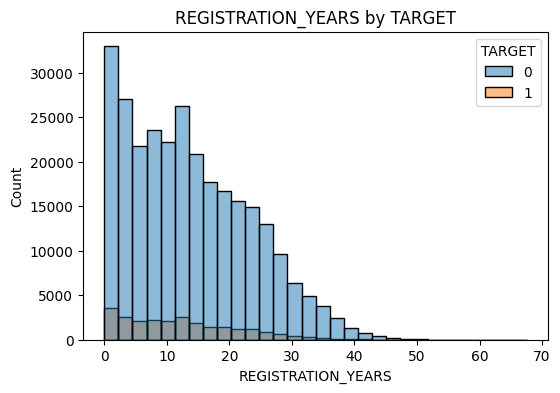

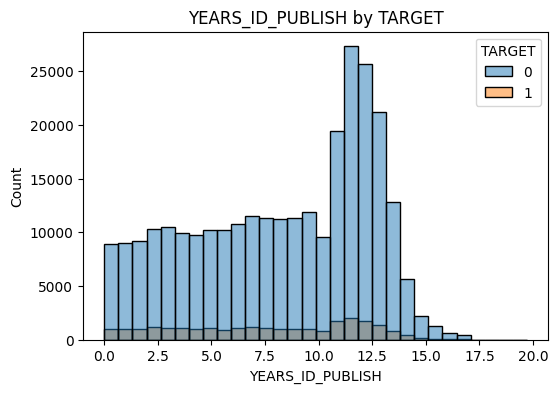

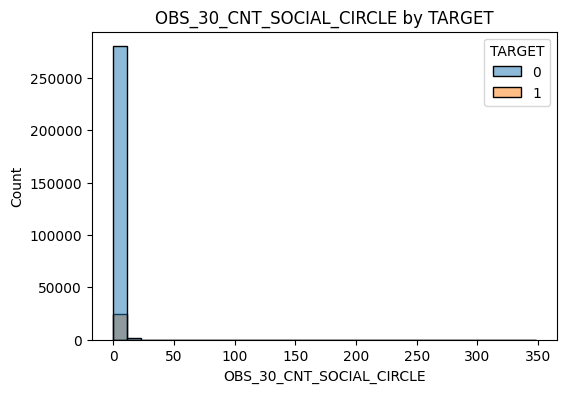

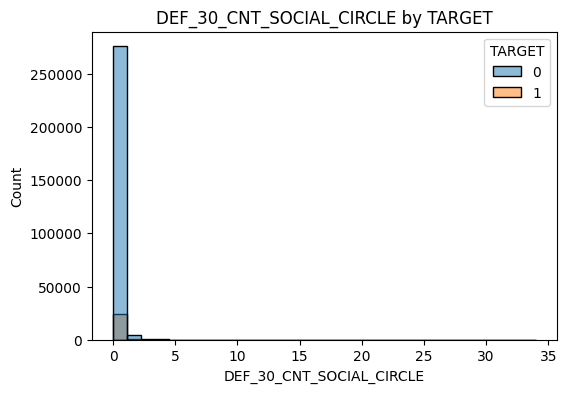

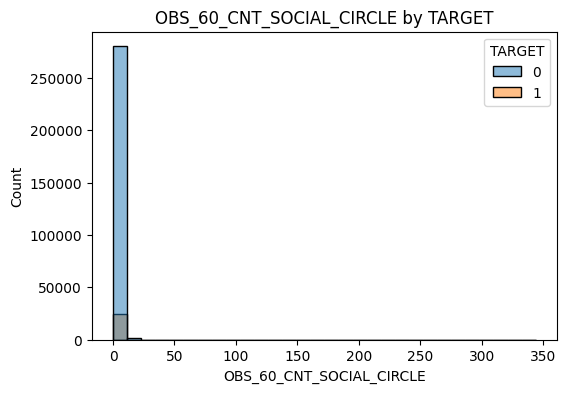

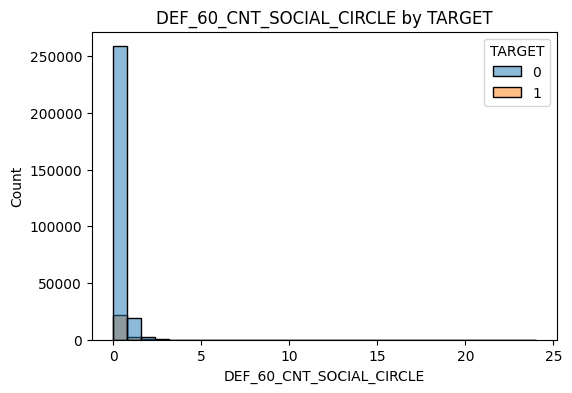

In [101]:
plot_hist(hist_cols)

### Bivariate Analysis Application Data - Plots 